In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Plotting gene positions on chromosomes
by [Assya Trofimov](https://github.com/TrofimovAssya)

assya.trofimov@umontreal.ca


### Parameters
In this section we define the parameters for the code:
+ `horizontal` - if False the plot will be vertical bars if True - horizontal.
+ `fond` is the plot background color
+ `chromosome_col` is the chromosome color
+ `in log`
+ `figsize` define the size of the figure
+ `threshold_pep` is the threshold to subset the data (for example, only genes with >6 peptides)
+ `colormap` refer to [this page](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
+ `save_fig` if True will write figure to file if False will show in notebook
+ `fig_name` is the name for the figure png (if saving)
+ `dpi` quality of image (pixel)

In [18]:
horizontal = False
fond = '#31342E'
chromosome_col = 'grey'
in_log=False

threshold_pep = 6
colormap = 'jet'
transparency = 0.8
save_fig = False
fig_name = 'Genomic_pos'
dpi = 300

# Vertical plots

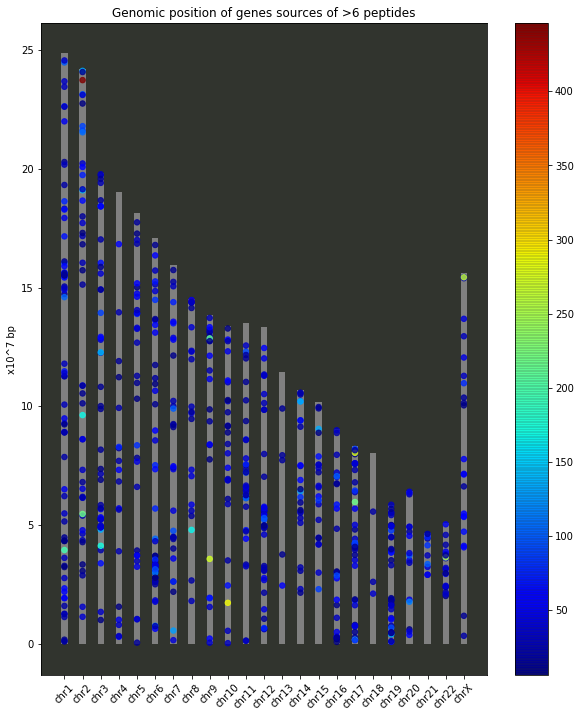

In [19]:
plt.rcParams['axes.facecolor'] = fond #to set the background to the color defined for fond
plt.figure(figsize=(10,12))


### Here we create the chromosome labels (1-23 and X)
chr_names = [str(i) for i in range(1,23)]
chr_names = chr_names+['X']
chr_names = [str(i) for i in chr_names]

### Here the chromosome file is loaded. It contains the size in bp of each chromosome
chromosome_sizes = pd.read_csv('./chr_file_n.txt',sep='\t',header=None)
chromosome_sizes.columns = ['chr','start','size']
chromosome_sizes['chr_ix'] = np.arange(chromosome_sizes.shape[0])
### To make things better for visualization, we set the sizes in 10^7bp
chromosome_sizes['10M bp'] = chromosome_sizes['size']/(10.**7)

### Plot the chromosomes
if horizontal:
    plt.barh(chromosome_sizes['chr_ix'],list(chromosome_sizes['10M bp']),height = 0.35,
         align='center',color=chromosome_col, zorder=0);
    plt.yticks(chromosome_sizes['chr_ix'], ['chr'+str(i) for i in chr_names]);
    plt.xlabel('x10^7 bp')
    
else:
    plt.bar(chromosome_sizes['chr_ix'], list(chromosome_sizes['10M bp']),width = 0.35,
            align='center',color=chromosome_col, zorder=0);
    plt.xticks(chromosome_sizes['chr_ix'], ['chr'+str(i) for i in chr_names],rotation=45);
    plt.ylabel('x10^7 bp')

### Here we load the chromosome annotation file. 
### It contains: geneID, chr, start and stop.
### Replace with your own file for the positions you want to show.
genes = pd.read_csv('chromomap_annot.txt',sep='\t',header=None)
genes.columns = ['geneID','chr','start','stop','n_peptides']
### here we select a threshold of number of peptides but this is optional
if threshold_pep>0:
    genes = genes[genes['n_peptides']>=threshold_pep]
### we set the dot on the middle position of the gene so halfway between start and stop
genes['10M bp_middle'] = (genes['start']+(genes['stop']-genes['start']))/(10.**7)
### we merge everything into a single file to make plotting easier and avoid having to sort.
ttemp = chromosome_sizes[['chr_ix','chr']]
ttemp = genes.merge(ttemp,left_on='chr', right_on='chr')

### log transformation for nb of peptides if needed
if in_log:
    ccs = np.log10(np.array(ttemp['n_peptides']))
else:
    ccs = np.array(ttemp['n_peptides'])

### plotting the dots at the chromosome positions
if horizontal:
    plt.scatter(list(ttemp['10M bp_middle']),list(ttemp['chr_ix']), 
                s=30,c=ccs,linestyle='None',cmap=colormap,
                zorder=10,alpha=transparency)
    
else:
    plt.scatter(list(ttemp['chr_ix']),list(ttemp['10M bp_middle']), 
                s=30,c=ccs,linestyle='None',cmap=colormap,
                zorder=10,alpha=transparency)

plt.colorbar() #this shows the color scheme
plt.title('Genomic position of genes sources of >6 peptides')
if save_fig:
    if in_log:
        plt.savefig(f'{fig_name}_log10.png' ,dpi = dpi)
    else:
        plt.savefig(f'{fig_name}.png' ,dpi = dpi)
    plt.close()

    
